In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
%matplotlib inline

from tdwg.lib.SRN_covered_LN_waveguide import WG_linear, WG_nonlin
# from tdwg.lib.SRN_covered_LN_waveguide_nonlin import WG_nonlin
from tdwg.lib.conductivity_fits import eps_r_a4, sigma_a4
from tdwg.lib.sweeps import sweep_zip

In [2]:
# def poole_conductivity(E, illumination, sigma0 = 1e-12, alpha = 1e3, poole_constant = 5.8e-8):
def poole_conductivity(E, illumination, sigma0 = 1e-9, alpha = 3.0e-1, poole_constant = 0):
    """
    returns Poole conductivity and a linear photoconductor, sigma ~ alpha*I + e^(c*E)
    
    E (V/m)
    illumination (mW/cm^2)
    sigma0: zero-field dark conductivity (1/Ohm.m)
    alpha: ~carriers/photon (cm^2 / mW)
    poole_constant (m/V)
    """
    sigma = sigma0 * ( alpha * illumination + np.exp(poole_constant * np.abs(E)) )
    return sigma

In [3]:
E_list = np.linspace(0, 220, 100) # V/um
E_list = 1e6 * E_list # V/m

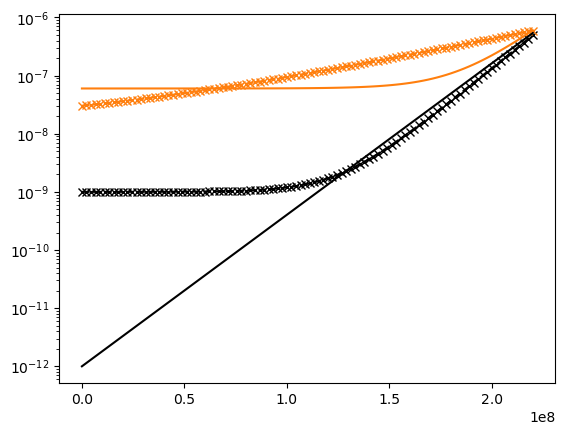

In [4]:
sigma0 = 1e-12
alpha = 6e2
poole_constant = 6e-8
nonlin_conductivity = lambda E, illumination : poole_conductivity(E, illumination, sigma0 = sigma0, alpha = alpha, poole_constant=poole_constant)

plt.plot(E_list, [sigma_a4(E, dark = True) for E in E_list], 'x--', c = 'k')
plt.plot(E_list, [sigma_a4(E, dark = False) for E in E_list], 'x--', c = 'tab:orange')
plt.plot(E_list, nonlin_conductivity(E_list, illumination=0), '-', c = 'k')
plt.plot(E_list, nonlin_conductivity(E_list, illumination=100), '-', c = 'tab:orange')
plt.yscale('log')

In [5]:
wg = WG_linear(d_co = 700e-9, d_pc = 4e-6, eps_pc = eps_r_a4, rho_pc=1e-14)

In [6]:
f = 10
V = 1100
print(wg.delta_n(f, V))
print(wg.modulation_efficiency)
wg.print_device(f,V)

0.006819527051236118
[0.9651923]
    o-----------o    
    |           |   
   ---          |   
 /     \        |       V = 1100.0 V
|  /\/  |       |       f = 10.0 Hz
 \     /        |   
   ---          |   
    |        o--o--o
    |        |     \
    |       ---    /    C = 0.9 nF
    |       ---    \    R = 0.0 MOhm
    |        |     /   |Z|= 0.0 MOhm 	
    |        o--o--o
    |           |   
    |        o--o--o
    |        |     \
    |       ---    /    C = 2.2 nF
    |       ---    \    R = inf MOhm
    |        |     /   |Z|= 7.2 MOhm 	||||||||||||||||||||||||
    |        o--o--o
    |           |   
    |        o--o--o
    |        |     \
    |       ---    /    C = 21.9 nF
    |       ---    \    R = inf MOhm
    |        |     /   |Z|= 0.7 MOhm 	||
    |        o--o--o
    |           |   
    |        o--o--o
    |        |     \
    |       ---    /    C = 1.1 nF
    |       ---    \    R = inf MOhm
    |        |     /   |Z|= 14.4 MOhm 	|||||||||||||||||||||||

## Frequency sweep

In [7]:
f_afg_list = 10**np.linspace(-3, 3, 40)
v_afg_list = [1100] * len(f_afg_list)
# Nonlin means the full nonlinear circuit simulator
illumination = 100
rho_pc_nonlin_bright = lambda E : 1/nonlin_conductivity(E, illumination)
rho_pc_nonlin_dark = lambda E : 1/nonlin_conductivity(E, illumination=0)

In [8]:
wg_lin_perfect_bright = WG_linear(d_co = 700e-9, d_pc = 4e-6, eps_pc = eps_r_a4, rho_pc=1e-14)
wg_lin_perfect_dark= WG_linear(d_co = 700e-9, d_pc = 4e-6, eps_pc = eps_r_a4, rho_pc=1e14)
wg_nonlin_bright = WG_nonlin(d_co = 700e-9, d_pc = 4e-6, eps_pc = eps_r_a4, rho_pc=rho_pc_nonlin_bright)
wg_nonlin_dark = WG_nonlin(d_co = 700e-9, d_pc = 4e-6, eps_pc = eps_r_a4, rho_pc=rho_pc_nonlin_dark)

In [9]:
dn_lin_perfect_bright_list = sweep_zip(wg_lin_perfect_bright.delta_n_eff, f_afg_list, v_afg_list)
dn_lin_perfect_dark_list = sweep_zip(wg_lin_perfect_dark.delta_n_eff, f_afg_list, v_afg_list)
dn_nonlin_bright_list, wg_nonlin_bright_list = sweep_zip(wg_nonlin_bright.delta_n_eff, f_afg_list, v_afg_list)
dn_nonlin_dark_list, wg_nonlin_dark_list = sweep_zip(wg_nonlin_dark.delta_n_eff, f_afg_list, v_afg_list)

100% 40 of 40 |#########################################| Elapsed Time: 0:00:00
100% 40 of 40 |#########################################| Elapsed Time: 0:00:00
100% 40 of 40 |#########################################| Elapsed Time: 0:00:13
100% 40 of 40 |#########################################| Elapsed Time: 0:00:13


In [12]:
# Realistic means a realistic linear value that roughly reproduces the full nonlinear simulation results
wg_lin_realistic_bright = WG_linear(d_co = 700e-9, d_pc = 4e-6, eps_pc = eps_r_a4, rho_pc=1.7e7)
wg_lin_realistic_dark= WG_linear(d_co = 700e-9, d_pc = 4e-6, eps_pc = eps_r_a4, rho_pc=1e10)
dn_lin_realistic_bright_list = sweep_zip(wg_lin_realistic_bright.delta_n_eff, f_afg_list, v_afg_list)
dn_lin_realistic_dark_list = sweep_zip(wg_lin_realistic_dark.delta_n_eff, f_afg_list, v_afg_list)

100% 40 of 40 |#########################################| Elapsed Time: 0:00:00
100% 40 of 40 |#########################################| Elapsed Time: 0:00:00


Text(0, 0.5, '$\\Delta n$')

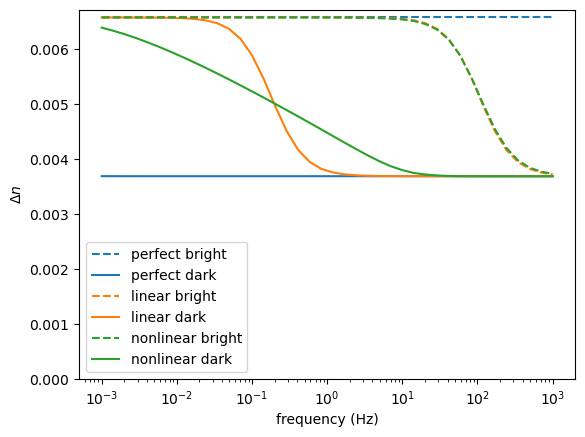

In [13]:
plt.plot(f_afg_list, np.abs(dn_lin_perfect_bright_list), label = r'perfect bright', ls = '--', c = 'tab:blue')
plt.plot(f_afg_list, np.abs(dn_lin_perfect_dark_list), label = r'perfect dark', ls = '-', c = 'tab:blue')
plt.plot(f_afg_list, np.abs(dn_lin_realistic_bright_list), label = r'linear bright', ls = '--', c = 'tab:orange')
plt.plot(f_afg_list, np.abs(dn_lin_realistic_dark_list), label = r'linear dark', ls = '-', c = 'tab:orange')
plt.plot(f_afg_list, np.abs(dn_nonlin_bright_list), label = r'nonlinear bright', ls = '--', c = 'tab:green')
plt.plot(f_afg_list, np.abs(dn_nonlin_dark_list), label = r'nonlinear dark', ls = '-', c = 'tab:green')
plt.xscale('log')
plt.ylim(0)
plt.legend()
plt.xlabel('frequency (Hz)')
plt.ylabel(r'$\Delta n$')

## Amplitude sweep

In [14]:
v_afg_list = np.linspace(0, 2000, 21)
f_afg_list = [10] * len(v_afg_list)
# Nonlin means the full nonlinear circuit simulator
illumination = 100
rho_pc_nonlin_bright = lambda E : 1/nonlin_conductivity(E, illumination)
rho_pc_nonlin_dark = lambda E : 1/nonlin_conductivity(E, illumination=0)

In [15]:
wg_lin_perfect_bright = WG_linear(d_co = 700e-9, d_pc = 4e-6, eps_pc = eps_r_a4, rho_pc=1e-14)
wg_lin_perfect_dark = WG_linear(d_co = 700e-9, d_pc = 4e-6, eps_pc = eps_r_a4, rho_pc=1e14)
wg_nonlin_bright = WG_nonlin(d_co = 700e-9, d_pc = 4e-6, eps_pc = eps_r_a4, rho_pc=rho_pc_nonlin_bright)
wg_nonlin_dark = WG_nonlin(d_co = 700e-9, d_pc = 4e-6, eps_pc = eps_r_a4, rho_pc=rho_pc_nonlin_dark)

In [16]:
dn_lin_perfect_bright_list = sweep_zip(wg_lin_perfect_bright.delta_n_eff, f_afg_list, v_afg_list)
dn_lin_perfect_dark_list = sweep_zip(wg_lin_perfect_dark.delta_n_eff, f_afg_list, v_afg_list)
dn_nonlin_bright_list, wg_nonlin_bright_list = sweep_zip(wg_nonlin_bright.delta_n_eff, f_afg_list, v_afg_list)
dn_nonlin_dark_list, wg_nonlin_dark_list = sweep_zip(wg_nonlin_dark.delta_n_eff, f_afg_list, v_afg_list)

100% 21 of 21 |#########################################| Elapsed Time: 0:00:00
100% 21 of 21 |#########################################| Elapsed Time: 0:00:00
100% 21 of 21 |#########################################| Elapsed Time: 0:00:06
100% 21 of 21 |#########################################| Elapsed Time: 0:00:06


Text(0, 0.5, '$\\Delta n$')

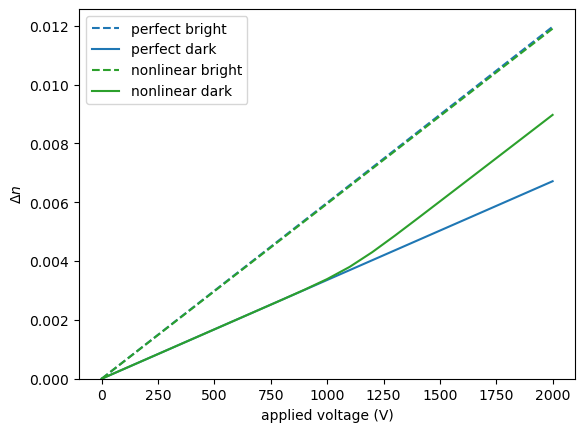

In [17]:
plt.plot(v_afg_list, np.abs(dn_lin_perfect_bright_list), label = r'perfect bright', ls = '--', c = 'tab:blue')
plt.plot(v_afg_list, np.abs(dn_lin_perfect_dark_list), label = r'perfect dark', ls = '-', c = 'tab:blue')
plt.plot(v_afg_list, np.abs(dn_nonlin_bright_list), label = r'nonlinear bright', ls = '--', c = 'tab:green')
plt.plot(v_afg_list, np.abs(dn_nonlin_dark_list), label = r'nonlinear dark', ls = '-', c = 'tab:green')
plt.ylim(0)
plt.legend()
plt.xlabel('applied voltage (V)')
plt.ylabel(r'$\Delta n$')

## Illumination sweep

(0.0, 6.491684906532969e-08)

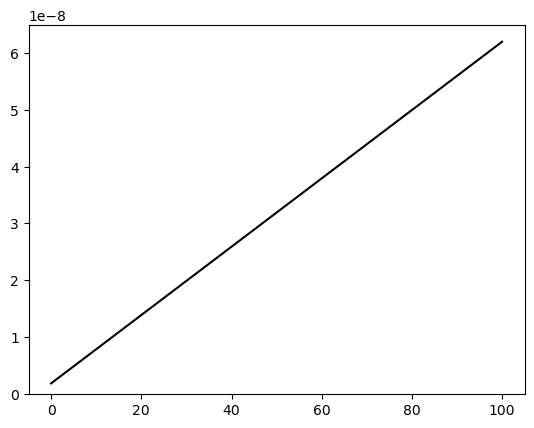

In [18]:
illumination_list = np.linspace(0, 100, 11)
f_afg_list = [10] * len(illumination_list)
v_afg_list = [1100] * len(illumination_list)
E = 30e6 * wg_lin_perfect_bright.eps_co / wg_lin_perfect_bright.eps_pc

sigma0 = 1e-12
alpha = 6e2
poole_constant = 6e-8
nonlin_conductivity = lambda E, illumination : poole_conductivity(E, illumination, sigma0 = sigma0, alpha = alpha, poole_constant=poole_constant)

plt.plot(illumination_list, nonlin_conductivity(E, illumination=illumination_list), '-', c = 'k')
plt.ylim(0)

In [23]:
def delta_n_for_wg(wg, f, Vapplied):
    return wg.delta_n_eff(f, Vapplied)

In [24]:
import copy

In [25]:
wg_lin_perfect_bright = WG_linear(d_co = 700e-9, d_pc = 4e-6, eps_pc = eps_r_a4, rho_pc=1e-14)
wg_lin_perfect_dark= WG_linear(d_co = 700e-9, d_pc = 4e-6, eps_pc = eps_r_a4, rho_pc=1e14)

# using the default argument "i = illumination" is necessary in the lamdba function
# https://docs.python.org/3.4/faq/programming.html#why-do-lambdas-defined-in-a-loop-with-different-values-all-return-the-same-result
wg_illumination_list = [WG_nonlin(d_co = 700e-9, d_pc = 4e-6, eps_pc = eps_r_a4, rho_pc=lambda E, i=illumination : 1/nonlin_conductivity(E, i)) for illumination in illumination_list] 

In [26]:
dn_lin_perfect_bright_list = sweep_zip(wg_lin_perfect_bright.delta_n_eff, f_afg_list, v_afg_list)
dn_lin_perfect_dark_list = sweep_zip(wg_lin_perfect_dark.delta_n_eff, f_afg_list, v_afg_list)

dn_nonlin_list, wg_nonlin_list = sweep_zip(delta_n_for_wg, wg_illumination_list, f_afg_list, v_afg_list)

100% 11 of 11 |#########################################| Elapsed Time: 0:00:00
100% 11 of 11 |#########################################| Elapsed Time: 0:00:00
100% 11 of 11 |#########################################| Elapsed Time: 0:00:03


Text(0, 0.5, '$\\Delta n$')

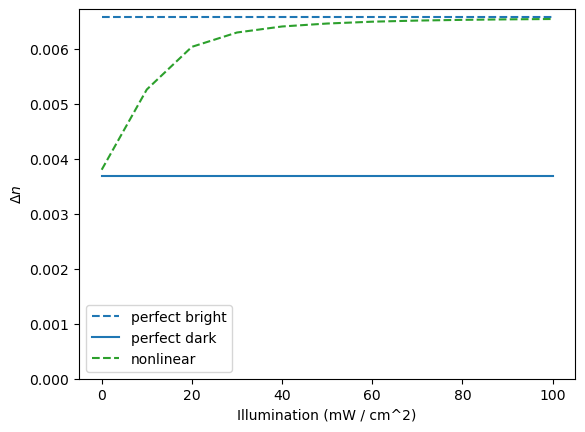

In [27]:
plt.plot(illumination_list, np.abs(dn_lin_perfect_bright_list), label = r'perfect bright', ls = '--', c = 'tab:blue')
plt.plot(illumination_list, np.abs(dn_lin_perfect_dark_list), label = r'perfect dark', ls = '-', c = 'tab:blue')
plt.plot(illumination_list, np.abs(dn_nonlin_list), label = r'nonlinear', ls = '--', c = 'tab:green')
plt.ylim(0)
plt.legend()
plt.xlabel('Illumination (mW / cm^2)')
plt.ylabel(r'$\Delta n$')